# Aula: Da Biblioteca Scikit-Learn ao PyTorch

Este material tem como objetivo ensinar a transi√ß√£o de um fluxo de trabalho b√°sico em Machine Learning usando Scikit-Learn para um fluxo de trabalho semelhante usando PyTorch. Abordaremos desde conceitos fundamentais at√© exemplos pr√°ticos, com exerc√≠cios e suas respectivas solu√ß√µes.

‚∏ª

## Sum√°rio
1.	Introdu√ß√£o aos Conceitos de Machine Learning
- Problemas de Classifica√ß√£o e Regress√£o
- Fun√ß√£o de Custo e Otimizadores
- Overfitting, Underfitting e Generaliza√ß√£o
2.	Fluxo de Trabalho em Scikit-Learn
- Carregando Dados
- Separando Dados em Treino e Teste
- Escolhendo e Treinando um Modelo
 Avaliando o Modelo
3. Fluxo de Trabalho em PyTorch
-  Instala√ß√£o e Estrutura B√°sica
-  Datasets e DataLoaders
-  Definindo o Modelo (Rede Neural)
-  Fun√ß√£o de Custo e Otimizador
-  Treinando e Avaliando o Modelo
4.	Exerc√≠cios
- Exerc√≠cio 1 - Ajustando um Modelo de Classifica√ß√£o no Scikit-Learn
- Exerc√≠cio 2 - Construindo uma Rede Neural Simples no PyTorch
5.	Conclus√£o

‚∏ª



## Introdu√ß√£o aos Conceitos de Machine Learning

### Problemas de Classifica√ß√£o e Regress√£o

No Machine Learning, lidamos principalmente com dois tipos de problemas:
- Classifica√ß√£o: quando a sa√≠da esperada √© uma classe ou categoria. Exemplos:
- Prever se um e-mail √© spam ou n√£o.
- Prever se um paciente tem ou n√£o uma doen√ßa espec√≠fica (diabetes, hipertens√£o etc.).
- Regress√£o: quando a sa√≠da esperada √© um valor cont√≠nuo. Exemplos:
- Prever o valor de um im√≥vel.
- Prever o pre√ßo de a√ß√µes na bolsa.

Fun√ß√£o de Custo e Otimizadores

Em ambos os tipos de problemas (classifica√ß√£o e regress√£o), precisamos de uma fun√ß√£o de custo (loss function) que me√ßa o qu√£o bom est√° o desempenho do modelo nos dados de treino. Exemplos de fun√ß√µes de custo:
- MSE (Mean Squared Error): muito usado em regress√£o.
- Cross-entropy: muito usado em classifica√ß√£o.

Para ajustar ou treinar o modelo, utilizamos otimizadores, que ajustam os pesos do modelo de acordo com a fun√ß√£o de custo. No Scikit-Learn, esses otimizadores s√£o internos e invis√≠veis para quem est√° usando (ex.: descida do gradiente, m√©todos fechados etc.). No PyTorch, configuramos explicitamente o otimizador, como SGD, Adam etc.

Overfitting, Underfitting e Generaliza√ß√£o
- Overfitting: quando o modelo se especializa demais nos dados de treino e n√£o generaliza bem para dados novos (dados de teste).
- Underfitting: quando o modelo n√£o captura de forma suficiente a rela√ß√£o entre os atributos e o alvo.
- Generaliza√ß√£o: √© a capacidade de um modelo aprender uma fun√ß√£o que fa√ßa sentido para dados novos (n√£o vistos durante o treino).



‚∏ª

# Fluxo de Trabalho em Scikit-Learn

### Carregando Dados

O Scikit-Learn possui v√°rios datasets de exemplo. Para fins did√°ticos, usaremos o famoso conjunto de dados Iris, que √© um problema de classifica√ß√£o de flores com 3 poss√≠veis classes.



In [ ]:
# Exemplo de c√≥digo para carregar dados
from sklearn.datasets import load_iris

iris = load_iris() # Carrega o dataset Iris
""" 
O que temos nesse dataset?
- Iris √© um dataset cl√°ssico de aprendizado de m√°quina.
- Cont√©m 150 amostras de flores de √≠ris, com 4 atributos (comprimento e largura da s√©pala e p√©tala).
# Atributos:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

- As amostras est√£o divididas em 3 classes (esp√©cies de √≠ris):
- Iris Setosa
- Iris Versicolor
- Iris Virginica

- Cada classe tem 50 amostras.
- O dataset √© amplamente utilizado para testar algoritmos de classifica√ß√£o.

"""


X = iris.data  # Features (atributos)
y = iris.target  # Alvo (classes)

In [5]:
# vamos ver um exemplo de uma amostra de iris
print(X[0])  # Exibe os atributos da primeira amostra
print(y[0])  # Exibe a classe da primeira amostra
# Exibe o nome da classe correspondente
print(iris.target_names[y[0]])  # Exibe o nome da classe correspondente
# Exibe os nomes dos atributos
print(iris.feature_names)  # Exibe os nomes dos atributos

[5.1 3.5 1.4 0.2]
0
setosa
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


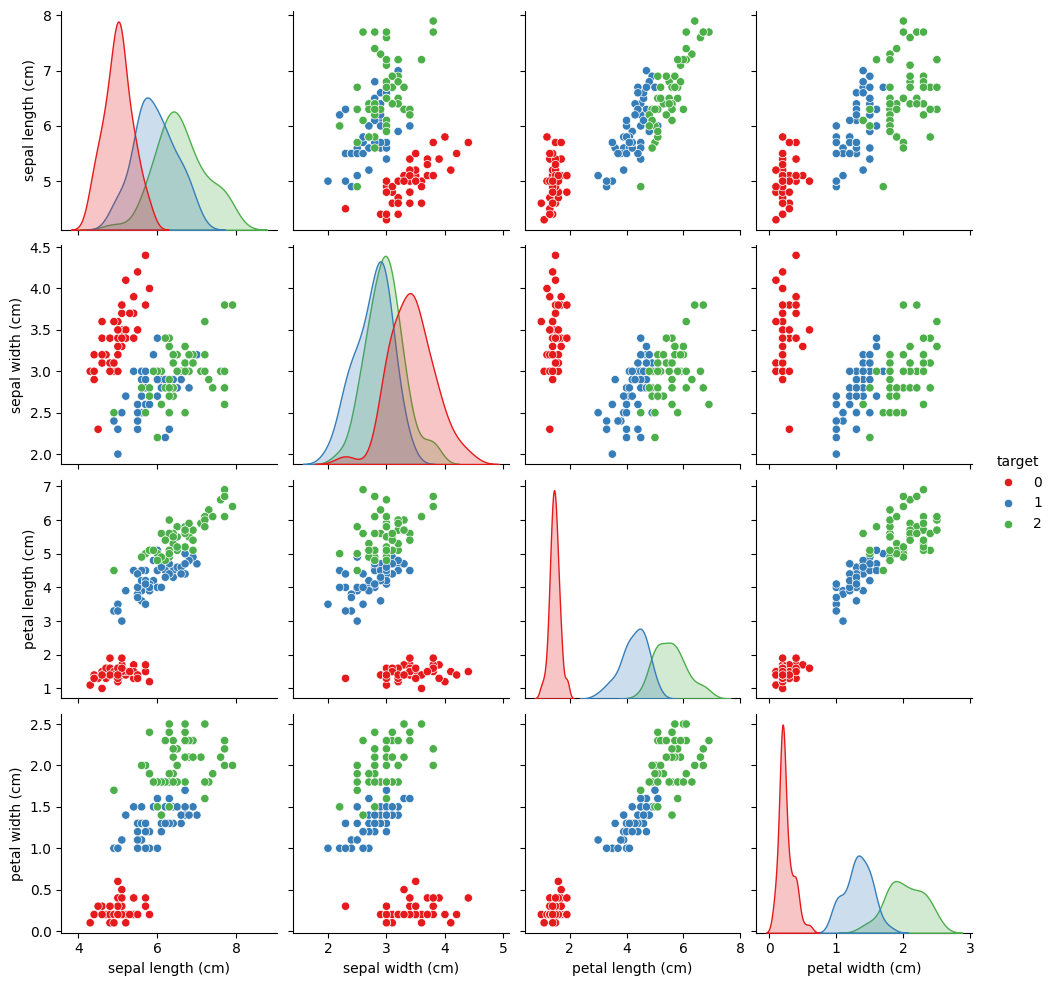

In [3]:
# para visualizar os dados, podemos usar o pandas
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())
# Visualizando os dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

### Separando Dados em Treino e Teste

√â pr√°tica comum separar os dados em treino e teste, para podermos avaliar de forma imparcial qu√£o bem o modelo generaliza.

In [8]:
from sklearn.model_selection import train_test_split

# Teste com 20% dos dados, mantendo o restante (80%) para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Escolhendo e Treinando um Modelo

No Scikit-Learn, podemos escolher facilmente entre diversos modelos, como Regress√£o Log√≠stica, SVM, √Årvore de Decis√£o, Random Forest etc.

In [9]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression(max_iter=200)  # Aumentamos max_iter para evitar warning
model.fit(X_train, y_train)  # Treinando o modelo

LogisticRegression(max_iter=200)

### Avaliando o Modelo

Para avaliar o modelo, podemos usar acur√°cia (no caso de classifica√ß√£o) ou erro m√©dio (no caso de regress√£o). Aqui, usamos acur√°cia:

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acur√°cia do modelo:", acc)

Acur√°cia do modelo: 1.0


# Fluxo de Trabalho em PyTorch

### Instala√ß√£o e Estrutura B√°sica

O PyTorch √© um framework de Deep Learning que nos d√° maior controle sobre a constru√ß√£o de modelos de rede neural, fun√ß√µes de custo, otimiza√ß√£o, etc. A estrutura b√°sica de uso do PyTorch envolve:
 1. Definir os tensores de entrada e sa√≠da.
 2. Criar um Dataset (e opcionalmente um DataLoader para facilitar o manuseio dos dados).
 3. Definir o modelo (rede neural).
 4. Definir a fun√ß√£o de custo (loss function).
 5. Definir o otimizador (e.g., torch.optim.SGD ou torch.optim.Adam).
 6. Executar o loop de treinamento:
- Forward pass: calcular a sa√≠da do modelo
- C√°lculo da perda (loss)
- Backward pass: atualizar os pesos usando o otimizador
- Avaliar o desempenho

### Datasets e DataLoaders

O PyTorch tem uma abstra√ß√£o chamada Dataset, onde definimos como acessar cada amostra e a respectiva label. Para problemas simples, podemos transformar diretamente arrays NumPy em tensores PyTorch.

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader

class IrisDataset(Dataset):
    def __init__(self, X, y):
        # Convertemos para tensores float
        self.X = torch.FloatTensor(X)
        """ 
        O que √© um floatTensor?
        - Um tensor de ponto flutuante (float) √© uma estrutura de dados que armazena n√∫meros reais. Ele √© como um array, mas pode ser usado em opera√ß√µes matem√°ticas complexas.
        - O PyTorch usa tensores para representar dados e realizar c√°lculos. Eles s√£o semelhantes aos arrays do NumPy, mas com suporte para GPU.
        - Tensores s√£o fundamentais para o aprendizado profundo, pois permitem opera√ß√µes eficientes em grandes conjuntos de dados.
        - FloatTensor √© um tipo espec√≠fico de tensor que armazena n√∫meros em ponto flutuante (decimais), o que √© √∫til para representar dados cont√≠nuos, como atributos de flores.
        - FloatTensor √© um tipo de tensor que armazena n√∫meros em ponto flutuante (decimais), o que √© √∫til para representar dados cont√≠nuos, como atributos de flores.
        """
        # Convertemos y para long (inteiros para classifica√ß√£o)
        self.y = torch.LongTensor(y)
        """ 
        O que √© um longTensor?
        - Um tensor de inteiros (long) √© uma estrutura de dados que armazena n√∫meros inteiros. Ele √© como um array, mas pode ser usado em opera√ß√µes matem√°ticas complexas.
        - O PyTorch usa tensores para representar dados e realizar c√°lculos. Eles s√£o semelhantes aos arrays do NumPy, mas com suporte para GPU.
        - Tensores s√£o fundamentais para o aprendizado profundo, pois permitem opera√ß√µes eficientes em grandes conjuntos de dados.
        - LongTensor √© um tipo espec√≠fico de tensor que armazena n√∫meros inteiros, o que √© √∫til para representar classes de classifica√ß√£o.
        """
        self.n_samples = X.shape[0] # aqui, X.shape[0] √© o n√∫mero de amostras (linhas) no dataset
        """
        O que √© X.shape[0]?
        - X.shape √© uma propriedade que retorna as dimens√µes de um array ou tensor.
        - X.shape[0] retorna o n√∫mero de linhas (amostras) no array ou tensor X.
        - Isso √© √∫til para saber quantas amostras temos no dataset, o que √© importante para treinar modelos de aprendizado de m√°quina.
        """

        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Exemplo de cria√ß√£o do dataset
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# DataLoader ajuda a gerar batches de forma automatizada
"""
O que √© um DataLoader?
- Um DataLoader √© uma ferramenta do PyTorch que facilita o carregamento de dados em lotes (batches) para treinamento de modelos.
- Ele permite iterar sobre grandes conjuntos de dados de forma eficiente, dividindo-os em partes menores (batches) para processamento.
- Isso √© √∫til para treinar modelos de aprendizado profundo, pois permite que o modelo processe os dados em partes, em vez de carregar tudo na mem√≥ria de uma vez.
- O DataLoader tamb√©m pode embaralhar os dados, aplicar transforma√ß√µes e carregar dados em paralelo, tornando o treinamento mais r√°pido e eficiente.
"""
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

### Definindo o Modelo (Rede Neural)

No PyTorch, definimos modelos criando classes que herdam de nn.Module. Cada camada √© geralmente definida dentro do __init__, e o forward pass √© definido no m√©todo forward.

In [15]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # primeira camada densa, √© um Linear, ou seja, uma camada totalmente conectada. Ela recebe como entrada o tamanho do vetor de entrada (input_size) e o n√∫mero de neur√¥nios na camada oculta (hidden_size).
        self.relu = nn.ReLU()                         # fun√ß√£o de ativa√ß√£o ReLU. relu √© uma fun√ß√£o de ativa√ß√£o que introduz n√£o-linearidade na rede. Ela √© importante para permitir que a rede aprenda padr√µes complexos nos dados.
        self.fc2 = nn.Linear(hidden_size, num_classes) # segunda camada densa, que recebe como entrada o n√∫mero de neur√¥nios da camada oculta (hidden_size) e o n√∫mero de classes (num_classes). Essa camada produz a sa√≠da final da rede, que representa as probabilidades para cada classe.
        
    def forward(self, x):
        out = self.fc1(x) # Passa a entrada pela primeira camada densa
        out = self.relu(out) # Aplica a fun√ß√£o de ativa√ß√£o ReLU
        out = self.fc2(out) # Passa pela segunda camada densa
        return out

In [16]:
!pip install torchviz

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.1/47.1 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [17]:
!pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [19]:
!brew install graphviz

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
api-linter      erlfmt          nip4            sacad           xtl
buffrs          intermodal      protoc-gen-doc  uhubctl
==> New Casks
deepchat                                 liviable

You have 14 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/graphviz/manifests/12.2.1
######################################################################### 100.0%
==> Fetching dependencies for graphviz: gd, jasper, netpbm, gts, gdk-pixbuf, librsvg and libtool
==> Downloading https://ghcr.io/v2/homebrew/core/gd/manifests/2.3.3_6
######################################################################### 100.0%
==> Fetching gd
==> Downloading https://ghcr.io/v2/homebrew/core/gd/blobs/sha2

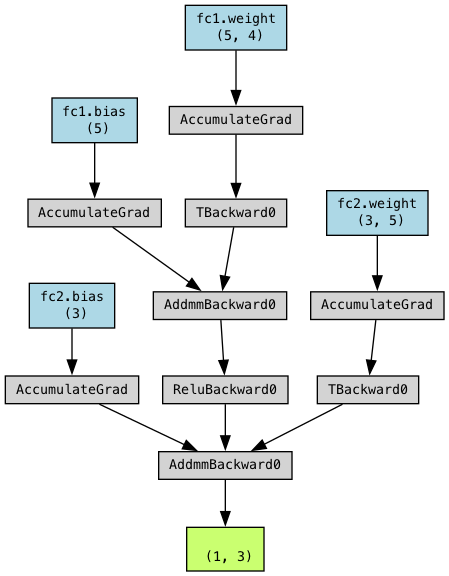

In [20]:
# para rodar abaixo, precisamos fazer pip install torchviz e graphviz
# como fazer uma visualiza√ß√£o do modelo?
from torchviz import make_dot
# Criando uma inst√¢ncia do modelo
model = SimpleNet(input_size=4, hidden_size=5, num_classes=3)
# Criando um tensor de exemplo para visualizar o modelo
x = torch.randn(1, 4)  # Um tensor de entrada com 4 atributos
# Gerando o gr√°fico do modelo
dot = make_dot(model(x), params=dict(model.named_parameters()))
# Exibindo o gr√°fico
dot.render("model_architecture", format="png")  # Salva o gr√°fico como imagem
# Exibindo o gr√°fico
from IPython.display import Image
Image(filename="model_architecture.png")  # Exibe a imagem do gr√°fico
# Exibindo o gr√°fico

## üß† Visualiza√ß√£o Explicada do Grafo Computacional do Modelo `SimpleNet`

Este grafo representa as **opera√ß√µes realizadas automaticamente pelo PyTorch** para computar os gradientes durante o treinamento da rede neural `SimpleNet`. Abaixo, explicamos os blocos principais da imagem em estilo de aula.

---

### üéØ Objetivo da Visualiza√ß√£o

Visualizar o fluxo de dados e gradientes da rede neural:
- Como os tensores fluem entre as camadas
- Como os gradientes s√£o acumulados para cada par√¢metro trein√°vel

---

### üß© Etapas do Grafo

#### 1. **Input da Rede**
O tensor de entrada tem formato `(1, 4)`  
*(Ex: uma amostra com 4 atributos)*

---

#### 2. **Camada Linear 1 (`fc1`)**

- **Pesos:** `fc1.weight (5, 4)`  
- **Bias:** `fc1.bias (5)`  
- **Opera√ß√µes:**
  - `AddmmBackward0`: executa `x @ W.T + b`
  - `TBackward0`: gradiente da transposi√ß√£o usada na multiplica√ß√£o
  - `AccumulateGrad`: onde os gradientes s√£o armazenados

> ‚úèÔ∏è Sa√≠da: tensor com shape `(1, 5)`

---

#### 3. **Fun√ß√£o de Ativa√ß√£o: ReLU**

- **Opera√ß√£o:** `ReluBackward0`  
- Aplica a n√£o-linearidade ponto a ponto  
- Gradiente √© passado apenas onde a sa√≠da foi positiva

> ‚úèÔ∏è Sa√≠da ap√≥s ReLU: tensor ainda com shape `(1, 5)`

---

#### 4. **Camada Linear 2 (`fc2`)**

- **Pesos:** `fc2.weight (3, 5)`  
- **Bias:** `fc2.bias (3)`  
- **Opera√ß√µes:**
  - `AddmmBackward0`: executa `x @ W.T + b`
  - `TBackward0` e `AccumulateGrad`: como na `fc1`

> ‚úèÔ∏è Sa√≠da final: tensor com shape `(1, 3)`  
*(3 neur√¥nios, cada um representando uma classe no output)*

---

### üîÑ Fluxo de Gradientes

Cada camada possui:
- Um bloco `Backward` (como `AddmmBackward0`, `ReluBackward0`)
- Blocos `AccumulateGrad` ligados aos par√¢metros
  - Mostra onde os gradientes ser√£o armazenados para atualiza√ß√£o posterior

---

### üü¶ Legenda Visual

| Bloco                          | Cor       | Significado                        |
|-------------------------------|------------|------------------------------------|
| `fc*.weight`, `fc*.bias`      | Azul       | Par√¢metros trein√°veis              |
| `*Backward*`                  | Cinza      | Opera√ß√µes no grafo do autograd     |
| `AccumulateGrad`              | Cinza      | Armazenamento dos gradientes       |
| Sa√≠da final                   | Verde-lim√£o| Tensor de sa√≠da do modelo          |

---

### ‚úÖ Conclus√£o

Esse grafo √© gerado automaticamente pelo PyTorch e mostra com clareza:
- Como cada camada opera
- Como os gradientes ser√£o computados e aplicados
- Como o PyTorch conecta todos os elementos da rede para o `backpropagation`

Ideal para depura√ß√£o, entendimento da arquitetura e ensino.

---

### Fun√ß√£o de Custo e Otimizador

Para um problema de classifica√ß√£o com 3 classes (como o Iris), normalmente usamos nn.CrossEntropyLoss como fun√ß√£o de custo, pois ela combina LogSoftmax e NLLLoss. Para otimiza√ß√£o, podemos usar torch.optim.Adam, torch.optim.SGD etc.

In [21]:
 # 4 atributos (Iris), 3 classes. 
 # Definimos 8 como tamanho da camada oculta, mas isso pode ser ajustado conforme necess√°rio. 
 # Esse n√∫mero foi escolhido de forma arbitr√°ria, e pode ser ajustado conforme necess√°rio. 
 # O n√∫mero de classes √© 3, pois temos 3 tipos de flores no dataset Iris (Setosa, Versicolor e Virginica). 
 # O tamanho da camada oculta (hidden_size) pode ser ajustado conforme necess√°rio, 
 # mas 8 √© um bom ponto de partida para come√ßar a experimentar.
# o input_size √© o n√∫mero de atributos (4 para o dataset Iris), que s√£o as caracter√≠sticas das flores (comprimento e largura da s√©pala e p√©tala).
# O hidden_size √© o n√∫mero de neur√¥nios na camada oculta (8 nesse caso),
# e num_classes √© o n√∫mero de classes de sa√≠da (3 para o dataset Iris).
model = SimpleNet(input_size=4, hidden_size=8, num_classes=3) 

# Definindo a fun√ß√£o de custo e o otimizador
# A fun√ß√£o de custo utilizada √© a CrossEntropyLoss, que √© adequada para problemas de classifica√ß√£o multiclasse.
# O otimizador utilizado √© o Adam, que √© um dos otimizadores mais populares e eficientes para treinamento de redes neurais.
# A fun√ß√£o de custo (loss function) mede o qu√£o bem a rede neural est√° se saindo em rela√ß√£o aos dados de treinamento.
criterion = nn.CrossEntropyLoss()  # fun√ß√£o de custo

# O otimizador (optimizer) √© respons√°vel por atualizar os pesos da rede neural durante o treinamento,
# com base na fun√ß√£o de custo e no gradiente calculado.
# A fun√ß√£o de custo CrossEntropyLoss √© adequada para problemas de classifica√ß√£o multiclasse.
# O otimizador Adam √© uma escolha popular devido √† sua efici√™ncia e capacidade de lidar com grandes conjuntos de dados.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam com taxa de aprendizado 0.01

### Treinando e Avaliando o Modelo

O loop de treinamento √© tipicamente assim:
 1. Zeramos os gradientes (optimizer.zero_grad()).
 2. Fazemos o forward pass (outputs = model(inputs)).
 3. Calculamos a perda (loss = criterion(outputs, labels)).
 4. Backward pass (loss.backward()).
 5. Atualizamos os par√¢metros (optimizer.step()).

In [22]:
num_epochs = 50  # quantidade de vezes que passaremos por todo o dataset

# Por que 50 √©pocas?
# O n√∫mero de √©pocas (num_epochs) √© um hiperpar√¢metro que pode ser ajustado conforme necess√°rio.
# O valor de 50 √©pocas √© um ponto de partida razo√°vel para muitos problemas de aprendizado de m√°quina,
# mas pode ser ajustado com base na converg√™ncia do modelo e na performance nos dados de valida√ß√£o.
# Precisamos fazer com que o modelo rode v√°rias vezes pelos dados de treinamento para que ele aprenda 
# os padr√µes presentes nos dados.
# O treinamento de um modelo de aprendizado de m√°quina geralmente envolve v√°rias itera√ß√µes sobre os dados de treinamento.

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader): 
        # Forward

        # O que √© forward?
        # O forward pass √© o processo de passar os dados de entrada pela rede neural para obter as previs√µes.
        # Durante o forward pass, os dados de entrada s√£o multiplicados pelos pesos da rede neural e passam por fun√ß√µes de ativa√ß√£o,
        # resultando nas previs√µes da rede.
        outputs = model(inputs) # Passa os dados de entrada pela rede

        # O que √© loss?
        # A loss (ou fun√ß√£o de custo) mede a diferen√ßa entre as previs√µes da rede e os r√≥tulos reais (labels).
        # O objetivo do treinamento √© minimizar essa diferen√ßa, ajustando os pesos da rede neural.
        loss = criterion(outputs, labels) # Calcula a perda (loss) entre as previs√µes e os r√≥tulos reais

        # Zera gradientes anteriores
        # O que √© optimizer?
        # O otimizador √© respons√°vel por atualizar os pesos da rede neural com base no gradiente da fun√ß√£o de custo.
        # O otimizador calcula os gradientes dos pesos em rela√ß√£o √† fun√ß√£o de custo e ajusta os pesos na dire√ß√£o oposta a esses gradientes,
        # com o objetivo de minimizar a fun√ß√£o de custo.
        optimizer.zero_grad()
     
        # Backward
        # O que √© loss.backward()?
        # O loss.backward() calcula os gradientes da fun√ß√£o de custo em rela√ß√£o aos pesos da rede neural.
        # Esses gradientes s√£o usados pelo otimizador para atualizar os pesos da rede.
        loss.backward()
     
        # Atualiza par√¢metros
        # O que √© optimizer.step()?
        # O optimizer.step() atualiza os pesos da rede neural com base nos gradientes calculados pelo loss.backward().        
        optimizer.step()
        
        
    
    # Podemos imprimir a cada √©poca para ver a evolu√ß√£o
    if (epoch+1) % 10 == 0:
        print(f"√âpoca [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

√âpoca [10/50], Loss: 0.4187
√âpoca [20/50], Loss: 0.1415
√âpoca [30/50], Loss: 0.2997
√âpoca [40/50], Loss: 0.1742
√âpoca [50/50], Loss: 0.2292


In [ ]:
# √â certo dizer que quanto mais √©pocas necess√°rias, mais o modelo aprende?
# N√£o necessariamente.
# O n√∫mero de √©pocas necess√°rias para treinar um modelo depende de v√°rios fatores, incluindo a complexidade do modelo,
# a quantidade e qualidade dos dados, a taxa de aprendizado e a fun√ß√£o de custo.
# Em alguns casos, o modelo pode aprender rapidamente e atingir uma boa performance em poucas √©pocas,
# enquanto em outros casos, pode levar muitas √©pocas para convergir.
# Al√©m disso, √© importante monitorar a performance do modelo em dados de valida√ß√£o para evitar overfitting,
# que √© quando o modelo aprende a memorizar os dados de treinamento em vez de generalizar para novos dados.

Para avaliar o modelo, podemos calcular a acur√°cia no conjunto de teste:

In [23]:
with torch.no_grad():  # desliga o autograd para velocidade
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # outputs.shape = [batch_size, num_classes]
        _, predicted = torch.max(outputs.data, 1)  # pega o √≠ndice com maior valor
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Acur√°cia no conjunto de teste: {:.2f}%".format(100 * correct / total))

Acur√°cia no conjunto de teste: 100.00%


# Exerc√≠cios

A seguir, temos dois exerc√≠cios pr√°ticos para refor√ßar a transi√ß√£o do Scikit-Learn para o PyTorch.

## Exerc√≠cio 1 - Ajustando um Modelo de Classifica√ß√£o no Scikit-Learn

Tarefa: Usar o dataset Iris para:
 1. Carregar os dados
 2. Separar em treino e teste
 3. Ajustar um modelo de √Årvore de Decis√£o do Scikit-Learn
 4. Calcular a acur√°cia em treino e teste


### Explica√ß√£o:
Uma √Årvore de Decis√£o √© simples de entender e de interpretar. Vamos treinar a √°rvore de decis√£o no mesmo dataset que vimos e comparar a acur√°cia obtida.

In [24]:
# SOLU√á√ÉO DO EXERC√çCIO 1

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Passo 1: Carregar os dados
iris = load_iris()
X = iris.data
y = iris.target

# Passo 2: Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Passo 3: Ajustar o modelo (√Årvore de Decis√£o)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Passo 4: Calcular acur√°cia em treino e teste
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Acur√°cia em Treino: {:.2f}%".format(train_acc * 100))
print("Acur√°cia em Teste: {:.2f}%".format(test_acc * 100))

Acur√°cia em Treino: 100.00%
Acur√°cia em Teste: 100.00%


# Exerc√≠cio 2 - Construindo uma Rede Neural Simples no PyTorch

Tarefa: Crie uma rede neural em PyTorch para classificar o mesmo dataset Iris e calcule a acur√°cia final. Siga estes passos:
 1. Crie o dataset personalizado (subclasse de Dataset) ou transforme arrays NumPy em Tensores.
 2. Crie DataLoader para treino e teste.
 3. Defina um modelo simples com duas camadas densas.
 4. Use nn.CrossEntropyLoss como fun√ß√£o de custo e Adam como otimizador.
 5. Treine o modelo por 30 √©pocas e calcule a acur√°cia final em teste.

### Explica√ß√£o:
Neste exerc√≠cio, vamos repetir a configura√ß√£o que vimos, mas adaptada para atender exatamente √†s instru√ß√µes solicitadas.

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# SOLU√á√ÉO DO EXERC√çCIO 2

# Passo 1: Definir o dataset usando subclass de Dataset
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()
        self.n_samples = len(y)
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Carrega dados do iris, separa em treino e teste
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instancia os datasets
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# Passo 2: Crie DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

# Passo 3: Defina o modelo simples
class MyNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MyNet(input_dim=4, hidden_dim=8, output_dim=3)

# Passo 4: Definir fun√ß√£o de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Passo 5: Treinar o modelo por 30 √©pocas
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"√âpoca [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Avaliar no conjunto de teste
correct = 0
total = 0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

acc = 100 * correct / total
print(f"Acur√°cia em teste: {acc:.2f}%")

√âpoca [10/100], Loss: 0.4547
√âpoca [20/100], Loss: 0.1746
√âpoca [30/100], Loss: 0.0344
√âpoca [40/100], Loss: 0.0893
√âpoca [50/100], Loss: 0.4685
√âpoca [60/100], Loss: 0.1205
√âpoca [70/100], Loss: 0.0751
√âpoca [80/100], Loss: 0.2924
√âpoca [90/100], Loss: 0.1988
√âpoca [100/100], Loss: 0.0070
Acur√°cia em teste: 96.67%


# Conclus√£o

Nesta aula, vimos como funciona o fluxo de trabalho b√°sico em Scikit-Learn e como podemos migrar para um ambiente de PyTorch, que oferece mais flexibilidade e controle na constru√ß√£o de modelos de rede neural.
	‚Ä¢	Scikit-Learn: focado em algoritmos cl√°ssicos de ML (Regress√£o, Classifica√ß√£o, Clustering etc.), al√©m de pipelines simples e bem estruturados.
	‚Ä¢	PyTorch: focado no desenvolvimento de redes neurais e modelos profundos, com a possibilidade de controlar cada detalhe do processo (camadas, fun√ß√µes de ativa√ß√£o, otimizadores).

Com os exerc√≠cios, refor√ßamos a compreens√£o dessas duas abordagens e constru√≠mos um pipeline de classifica√ß√£o passo a passo. Esperamos que agora voc√™ se sinta confort√°vel para decidir em qual biblioteca se basear dependendo do seu problema e grau de complexidade necess√°rio.